In [6]:
import pandas as pd

data = pd.read_csv(r"C:\Users\prave\Downloads\data.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Pandas - A python Library to efficiently manage Data Preprocessing and Handling

# Data Description using info(),shape & describe
print(data.info())

print(data.shape)

# NOTE:Anything in python is an object. Any object in python have two types of components - Methods & Properties

print(data.describe())

# Q1. How do you get categorical variables in describe method ?

data_categorical = pd.Categorical(data.Item_Fat_Content,['Low Fat','Regular'])
print(data_categorical.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None
(8523, 12)
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782    

In [5]:
# Q2. Use isna instead isnull and find out missing values in the dataset ?

data["Item_Type"].isna()

sum(data["Item_Type"].isna())

sum(data["Item_Weight"].isna())

for column in data.columns:
    print("Missing Values in",column,sum(data[column].isna()))



 # How to perform deletion in pandas for addressing Missing Values.

data_removed_columns_missing_values = data.dropna()
print(data.shape)

print(data_removed_columns_missing_values.shape)




Missing Values in Item_Identifier 0
Missing Values in Item_Weight 1463
Missing Values in Item_Fat_Content 0
Missing Values in Item_Visibility 0
Missing Values in Item_Type 0
Missing Values in Item_MRP 0
Missing Values in Outlet_Identifier 0
Missing Values in Outlet_Establishment_Year 0
Missing Values in Outlet_Size 2410
Missing Values in Outlet_Location_Type 0
Missing Values in Outlet_Type 0
Missing Values in Item_Outlet_Sales 0
(8523, 12)
(4650, 12)


In [ ]:
# Q3. This is strange behaviour happening over here with removal of missing values. Explore and Elaborate.

Answer:
The dropna function is removing the complete rows and making the total rows as half which will significantly impact the overall performance of the model.

Instead we can use fillna to fill it with either mean or median or mode values and makeup so that we can get optimum output from the model being built.



In [7]:
import numpy as np
non_numerical_features = data.select_dtypes(include=[np.object])
non_numerical_features

numerical_features = data.select_dtypes(include = [np.float64])
numerical_features

numerical_features.corr()


import matplotlib.pyplot as plt

# Histogram
plt.hist(data["Item_Weight"],25,facecolor="green",alpha=0.2)
plt.title("Histogram for Item_Weight Variable")
plt.show()

# Bar plot
print(data.Item_Fat_Content.head())
print(data.groupby([data["Item_Fat_Content"]]))
print(data.groupby([data["Item_Fat_Content"]]).size())

counts = dict(data.groupby([data["Item_Fat_Content"]]).size())

plt.bar(list(counts.keys()),list(counts.values()))
plt.title("Bar Plot for Item_Fat_Content Variable")
plt.show()


C:\Users\prave\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\prave\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 640x480 with 1 Axes>

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object
Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
dtype: int64


<Figure size 640x480 with 1 Axes>

In [8]:
import numpy as np
non_numerical_features = data.select_dtypes(include=[np.object])
non_numerical_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
6,FDO10,Regular,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
7,FDP10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8,FDH17,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,FDU28,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [9]:
for column in non_numerical_features:
    dummy = pd.get_dummies(data[column])
    data = data.drop(column,axis=1)
    data = data.join(dummy)
    
print(data)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
5          10.395         0.000000   51.4008                       2009   
6          13.650         0.012741   57.6588                       1987   
7             NaN         0.127470  107.7622                       1985   
8          16.200         0.016687   96.9726                       2002   
9          19.200         0.094450  187.8214                       2007   
10         11.800         0.000000   45.5402                       1999   
11         18.500         0.045464  144.1102                       1997   
12         15.100        

In [10]:
data = data.dropna()
training = data.sample(frac=0.7)
testing = data.drop(training.index)

In [11]:
train_Y = training["Item_Outlet_Sales"]
train_X = training.drop("Item_Outlet_Sales",axis = 1)

test_Y = testing["Item_Outlet_Sales"]
test_X = testing.drop("Item_Outlet_Sales",axis = 1)

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics




In [12]:
#Model Development using Lasso Regression

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics

def train_model(learning_method,X,Y):
    learning_method.fit(X,Y)
    return learning_method

Lasso = Lasso(normalize=True)

Lasso_reg_model = train_model(Lasso,train_X,train_Y)


predictions_Lasso_reg = Lasso_reg_model.predict(test_X)
print("The Testing Set RMSE Value is {}".format(metrics.mean_squared_error(test_Y,predictions_Lasso_reg)))
print("The Testing Set R2 Score Value is {}".format(metrics.r2_score(test_Y,predictions_Lasso_reg)))

predictions_Lasso_reg1 = Lasso_reg_model.predict(train_X)
print("The Training Set RMSE Value is {}".format(metrics.mean_squared_error(train_Y,predictions_Lasso_reg1)))
print("The Training Set R2 Score Value is {}".format(metrics.r2_score(train_Y,predictions_Lasso_reg1)))

The Testing Set RMSE Value is 1133470.0251206467
The Testing Set R2 Score Value is 0.5032245531043231
The Training Set RMSE Value is 1191242.376559106
The Training Set R2 Score Value is 0.4995693747476685


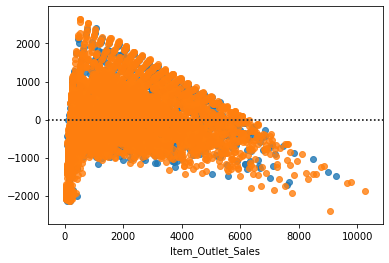

In [60]:
import seaborn as sb
sb.residplot(test_Y,predictions_Lasso_reg)
sb.residplot(train_Y,predictions_Lasso_reg1)

In [13]:
#Model Development using Linear Regression

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics


def train_model(learning_method,X,Y):
    learning_method.fit(X,Y)
    return learning_method

LR = LinearRegression(normalize=True)

linear_reg_model = train_model(LR,train_X,train_Y)

predictions_linear_reg = linear_reg_model.predict(test_X)
print("The Testing Set RMSE Value is {}".format(metrics.mean_squared_error(test_Y,predictions_linear_reg)))
print("The Testing Set R2 Score Value is {}".format(metrics.r2_score(test_Y,predictions_linear_reg)))

predictions_linear_reg1 = linear_reg_model.predict(train_X)
print("The Training Set RMSE Value is {}".format(metrics.mean_squared_error(train_Y,predictions_linear_reg1)))
print("The Training Set R2 Score Value is {}".format(metrics.r2_score(train_Y,predictions_linear_reg1)))


The Testing Set RMSE Value is 2.2640639518908e+34
The Testing Set R2 Score Value is -9.922903619627947e+27
The Training Set RMSE Value is 864814.92786144
The Training Set R2 Score Value is 0.6366987242954439


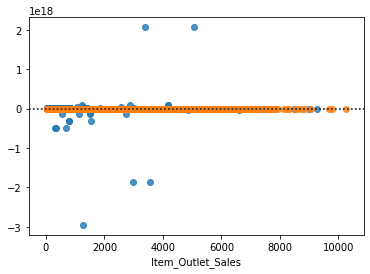

In [59]:
import seaborn as sb
sb.residplot(test_Y,predictions_linear_reg)
sb.residplot(train_Y,predictions_linear_reg1)

In [14]:
#Model Development using Ridge Regression

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics

def train_model(learning_method,X,Y):
    learning_method.fit(X,Y)
    return learning_method

ridge = Ridge(normalize = True)

ridge_reg_model = train_model(ridge,train_X,train_Y)


predictions_ridge_reg = ridge_reg_model.predict(test_X)
print("The Testing Set RMSE Value is {}".format(metrics.mean_squared_error(test_Y,predictions_ridge_reg)))
print("The Testing Set R2 Score Value is {}".format(metrics.r2_score(test_Y,predictions_ridge_reg)))

predictions_ridge_reg1 = ridge_reg_model.predict(train_X)
print("The Training Set RMSE Value is {}".format(metrics.mean_squared_error(train_Y,predictions_ridge_reg1)))
print("The Testing Set R2 Score Value is {}".format(metrics.r2_score(train_Y,predictions_ridge_reg1)))



The Testing Set RMSE Value is 1363440.798682543
The Testing Set R2 Score Value is 0.4024333268017172
The Training Set RMSE Value is 1022509.0661348589
The Testing Set R2 Score Value is 0.5704527799203455


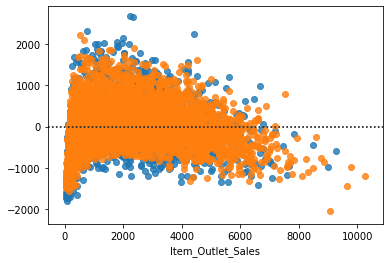

In [62]:
import seaborn as sb
sb.residplot(test_Y,predictions_ridge_reg)
sb.residplot(train_Y,predictions_ridge_reg1)
